# 차원축소


### 목차

- 차원의 저주

- 차원 축소를 위한 접근 방법

  - 투영

  - 매니폴드 학습

- PCA

- 커널 PCA

- LLE

- 다른 차원 축소 기법


### Load data


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import numpy as np

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)


X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

## 차원의 저주와 차원 축소


**차원의 저주**란 훈련 샘플의 특성(변수)이 많아지면 훈련 샘플 간의 거리가 너무 멀게 떨어져 있어서 과대적합이 발생해 학습이 제대로 이루어지지 않는 현상을 말한다.

이를 해결하기 위해서는 훈련 샘플의 수를 키우는 방법이 있지만, 훈련 샘플의 수를 키우면 훈련 시간이 오래 걸리는 단점이 있다.

이에 대한 대안으로 차원 축소를 사용할 수 있다.


### 차원 축소


**차원 축소**란 특성 수를 줄여서 학습이 불가능한 문제를 학습할 수 있도록 만드는 알고리즘이다.

훈련속도가 빨라지며 데이터 시각화에도 유용하지만 필연적으로 정보의 손실이 발생하여 성능이 저하될 수도 있다.

차원 축소는 모든 훈련 샘플이 고차원 공간 안의 저차원 부분 공간에 놓여 있다는 가정을 한다.

<br>

차원 축소는 투영과 매니폴드 학습으로 크게 두 가지로 나눌 수 있다.


### 투영


**투영(projection)**이란 고차원 공간에 있는 훈련 샘플을 저차원 부분 공간에 수직으로 투영시키는 것을 말한다. $x_1$, $x_2$, ..., $x_n$ 개의 특성을 통해 새로운 특성 $z_1$, $z_2$, ..., $z_n$ 개로 만드는 것이다.

하지만 차원 축소에 있어 투영은 언제나 최선의 방법은 아니다. 데이터는 많은 경우 복잡하게 뒤섞여 있음으로 투영하였을 때 오히려 더 복잡해질 수 있다.

예를 들어 아래와 같은 스위스 롤 데이터셋이 있을 때,

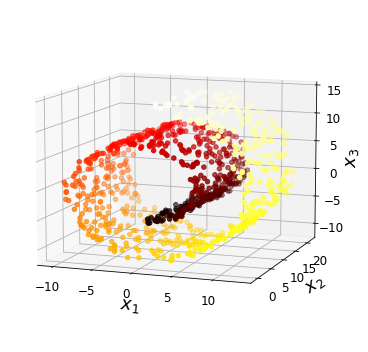

평면에 투영(좌측)한 것이 단순히 데이터를 펼쳐놓은(우측) 것보다 더 복잡함을 알 수 있다.

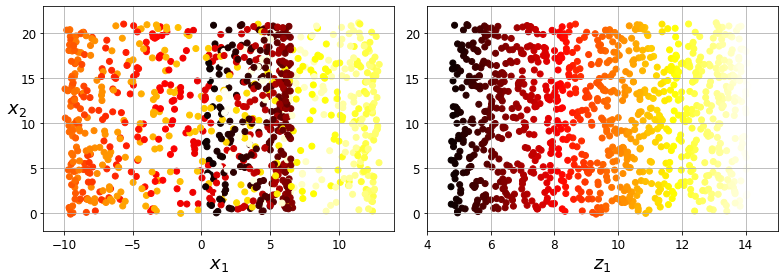


### 매니폴드 학습


**매니폴드**란 고차원에서 휘어지거나 뒤틀린 2D 모양의 데이터를 의미한다.

예를 들어 스위스 롤은 2D 매니폴드의 한 예이다. 스위스 롤을 펼치면 2D 평면이 되지만 3D 공간에서는 매니폴드가 된다.

그리고 스위스 롤 데이터셋은 3D 공간에 펼쳐지면 두 개의 차원을 가진 매니폴드가 된다. 이 매니폴드는 국소적으로는 2D 평면처럼 보이지만 전역적으로는 3D 공간으로 휘어져 있다.

<br>

대부분의 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 **매니폴드 가정**에 근거한다. 차원 축소 기법 중 LLE(지역 선형 임베딩) 기법은 매니폴드 가정에 기반한다.

하지만 항상 이 가정이 유효하지는 않기에 훈련 속도 향상에 도움이 되지만 항상 더 낫지는 않다.


## PCA


**주성분 분석**(PCA(Principal Component Analysis))은 대표적인 투영을 이용한 차원 축소 기법이다.

먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시킨다. 이때 투영된 데이터는 원본 데이터의 정보를 최대한 보존하는 것이 목표이다.

그렇다면 어떻게 정보를 최대한 보존할 수 있을까?

PCA는 분산을 정보로 인식하여 분산을 최대한 보존하는 축으로 데이터를 투영함으로서 정보의 손실을 최소화한다.


### 주성분


PCA는 분산을 정보로 인식하여 분산을 최대한 보존하는 축을 찾는 것이 목표이며 이 축을 **주성분(PC(Prinicpal Component))**이라고 한다.

주성분을 찾는 방법은 간단하다. 원본 데이터셋과 투영된 데이터셋의 평균 제곱 거리를 최소화하는 축을 찾는 것이다.

n개의 특성(변수)를 가지는 데이터는 n차원을 가짐으로 n개의 주성분을 가진다. 이전에 찾은 주성분과 수직이면서 분산을 최대한 보존하는 축을 찾는 것이기에 첫번째 주성분이 가장 많은 분산을 가지며 n번째 주성분은 가장 적은 분산을 가진다.

예를 들어 아래와 같은 데이터셋이 있을 때 c1 벡터가 c2 벡터에 비해 분산을 더 많이 보존하고 있으므로 c1 벡터가 정보를 더 많이 보존하고 있으며 더 많은 정보를 담고 있다고 할 수 있다. 또한 c1과 c2는 서로 직교함을 확인할 수 있다.

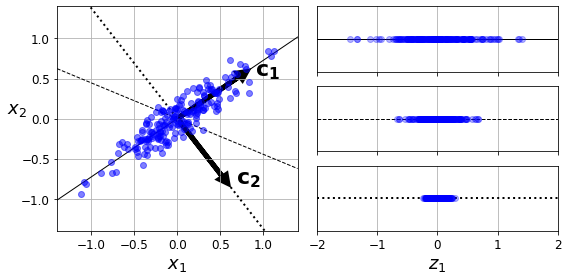


### Code: PCA 구현


특이값 분해(SVD)를 이용하여 PCA를 직접 구현할 수 있다.


In [2]:
# Create data
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

m, n = X.shape
print(f'{m}개의 샘플 개수와 {n}개의 특성을 가짐')

60개의 샘플 개수와 3개의 특성을 가짐


In [3]:
X_centered = X - X.mean(axis=0)  # 데이터를 중앙에 맞춤.
U, s, Vt = np.linalg.svd(X_centered)  # 특이값 분해: 3개의 다른 행렬 곱으로 분해 함.

c1 = Vt.T[:, 0]  # 첫번째 주성분
c2 = Vt.T[:, 1]  # 두번째 주성분
print(f'첫번째 주성분: {c1}')
print(f'두번째 주성분: {c2}')
print()


# 고유벡터 행렬(주 대각만 고유값인 행렬)을 생성
S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

# SVD의 정확성을 확인하기 위해 원본 데이터와 비교한다.
print(np.allclose(X_centered, U.dot(S).dot(Vt)))  # True


# 1번 주성분과 2번 주성분을 가져온다.
W2 = Vt.T[:, :2]

# 내적을 통해 두 주성분으로 정의된 평면에 데이터를 투영한다.
X2D = X_centered.dot(W2)
X2D[:5]  # 투영된 데이터 확인 (5개만)

첫번째 주성분: [0.93636116 0.29854881 0.18465208]
두번째 주성분: [-0.34027485  0.90119108  0.2684542 ]

True


array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

### Code: sklearn을 이용한 PCA


> sklearn을 이용해 PCA를 수행하는 것 + 적절한 차원수를 선택하는 것 기말 시험에 출제!!


In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # 주성분을 2개로 줄인다.
X2D = pca.fit_transform(X)  # PCA를 적용한다.

print("PCA를 적용한 데이터의 처음 5개 샘플\n")
print(X2D[:5])

print("\n\n주성분\n")
print(pca.components_)

print("\n\n주성분의 설명된 분산 비율로 각각 84%, 14% 만큼의 분산을 설명한다.\n")
print(pca.explained_variance_ratio_)

d = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
print(f"\n\n{d}개의 주성분을 사용하면 95% 이상의 분산을 설명할 수 있다.")

PCA를 적용한 데이터의 처음 5개 샘플

[[ 1.26203346  0.42067648]
 [-0.08001485 -0.35272239]
 [ 1.17545763  0.36085729]
 [ 0.89305601 -0.30862856]
 [ 0.73016287 -0.25404049]]


주성분

[[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]]


주성분의 설명된 분산 비율로 각각 84%, 14% 만큼의 분산을 설명한다.

[0.84248607 0.14631839]


2개의 주성분을 사용하면 95% 이상의 분산을 설명할 수 있다.


### 압축을 위한 PCA


차원을 축소하고 난 후에는 데이터의 크기가 줄어든다. 즉 **압축**할 수 있음을 의미한다.

이에 PCA를 이용해 데이터를 압축한 다음 `inverse_transform`을 이용해 다시 복원하여 압축과 복원을 수행할 수 있다.

이때 n개의 주성분을 이용해 데이터의 95%를 설명할 수 있다고 할 때, 설명하지 못하는 5%의 데이터는 유실된다. 즉, 데이터의 손실을 의미한다.


In [5]:
# Mnist 손글씨 데이터셋을 가져와 PCA를 이용해 압축하고 복원해보자.

# pca
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

# 복원
X_recovered = pca.inverse_transform(X_reduced)

mnist['data'].shape, X_reduced.shape, X_recovered.shape

((70000, 784), (52500, 154), (52500, 784))

PCA를 이용해 압축한 뒤 다시 복원하였을 때 살짝 흐릿함을 확인할 수 있다.


원본 이미지


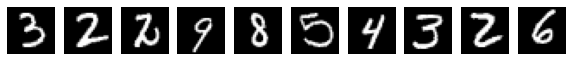

압축 해제된 이미지


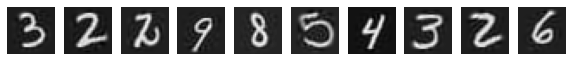

In [6]:
import matplotlib.pyplot as plt


def display_mnist_data(images):
    fig, axes = plt.subplots(1, 10, figsize=(10, 1))
    for i, ax in enumerate(axes.flat):
        img = images[i].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.axis('off')
    plt.show()


# 원본 이미지 10개를 화면상에 출력
print("원본 이미지")
display_mnist_data(X_train[:10])

# 압축해제된 이미지 10개를 화면상에 출력
print("압축 해제된 이미지")
display_mnist_data(X_recovered[:10])

### 랜덤 PCA


확률적 알고리즘을 통해 처음 d개의 주성분에 대한 근사값을 빠르게 찾는 기법을 **랜덤 PCA**라고 부른다.

찾고자 하는 주성분의 개수 d가 전체 특성의 개수 n보다 많이 작을 경우 full SVD보다 훨신 빠른다.

`svd_solver="randomized"`를 통해 랜덤 PCA를 수행할 수 있다.


In [7]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### 점진적 PCA


훈련세트를 미니배치로 나눈 후 점진적 PCA(IPCA)에 하나씩 주입하는 기벚을 **점진적 PCA**라고 부른다.

온라인 학습에 적용할 수 있다.


In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="")  # progress bar
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

### 커널 PCA


커널트릭은 특성을 추가하지 않고도 다항식 특성을 추가한 것과 동일한 효과를 얻을 수 있다.

이에 커널트릭을 PCA에 적용하여 차원 축소를 위한 복잡한 비선형 투영을 수행한 기법이 **커널 PCA**이다.

투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때 유용하게 사용된다.


In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

커널 PCA(kPCA)는 비지도 학습이며 좋은 커널과 하이퍼파라미터 선택을 위한 성능 측정 기준이 없다.

이에 커널과 하이퍼파라미터 튜닝을 아래 아래 두 가지 방법을 사용한다.


#### 1. kPCA를 전처리기로 사용한 예측기를 탐욕 알고리즘을 통해 최적의 하이퍼파라미터를 구할 수 있다.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

#### 2. KPCA를 통해 재구성할 때 발생하는 원상의 오차를 최소화하는 커널과 하이퍼파라미터를 선택.


**재구성 원상**이란 재구성된 포인트에 가까게 매핑된 원본 공간의 포인트를 찾을 수 있는 것을 의미한다.

`fit_inverse_transform=True`를 통해 재구성 원상을 찾을 수 있다.


In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf",
                    gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

## LLE


**지역선형임베딩(LLE)** 는 투영이 아닌 매니폴드 학습에 의존하는 비선형 차원축소 기법이다.

가장 가까운 이웃이 얼마나 선형적으로 연관되어 있는지 측정하여 국부적인 관계(relation)가 가장 잘 보존되는 데이터의 저차원 표현을 찾는다.

잡음이 너무 많지 않은 경우에 꼬인 매니폴드를 펼치는 것에 사용된다.


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

## 다른 차원 축소 기법


- 이전 학습랜덤 투영(random projection): 무작위 선형 투영을 사용해 데이터를 저차원 공간으로 투영한다. 빠르지만, 매니폴드 학습을 위한 투영이 아니므로 PCA보다 성능이 떨어진다.

- 다차원 스케일링(MDS): 샘플 간의 거리를 보존하면서 차원을 축소한다. 매니폴드 학습에 의존하지 않는다.

- Isomap: 각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든 후, 샘플 간의 지오데식 거리(Geodesic distance)를 유지하며 차원을 축소한다.

- t-SNE: 비슷한 샘플은 가깝게, 비슷하지 않은 샘플은 멀리 떨어지도록 차원을 축소한다. 주로 시각화에 많이 사용된다.

- 선형 판별 분석(LDA): 분류 알고리즘으로서, 클래스 사이를 가장 잘 구분하는 축을 학습한다. 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용된다.
